In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('./dataset/linreg-data.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 31.2 KB


In [ ]:
df.head()

,x1,x2,y
0,-2.201441,-0.468864,-30.355617
1,-0.291041,0.777277,25.560334
2,-0.327755,0.040071,32.797526
3,-0.075650,1.821915,72.734577
4,-0.862493,-0.467493,-48.072356


In [ ]:
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [ ]:
X = torch.Tensor(df[['x1','x2']].values)
y = torch.Tensor(df['y'].values)

torch.manual_seed(42)

In [ ]:
shuffle_idx = torch.randperm(y.size(0))

In [ ]:
shuffle_idx.dtype

torch.int64

In [ ]:
eightyPercent = int(y.size(0)*0.8)
X,y = X[shuffle_idx],y[shuffle_idx]

In [ ]:
X_Train,yTrain = X[:eightyPercent],y[:eightyPercent]
X_Test,yTest = X[eightyPercent:],y[eightyPercent:]

In [ ]:
Mean = X_Train.mean(dim=0)
std = X_Train.std(dim=0)
X_Train = (X_Train-Mean)/std
X_Test = (X_Test-Mean)/std

In [ ]:
X_Train.std(dim=0)

tensor([1., 1.])

In [ ]:
X_Train.shape

torch.Size([800, 2])

In [ ]:
class LinearReg :

  def __init__(self,numFeatures):
    self.numFeatures = numFeatures
    self.weights = torch.zeros(numFeatures,1,dtype=torch.float)
    self.bias = torch.zeros(1,dtype=torch.float)

  def forward(self,X):
    predictions = torch.add(torch.mm(X,self.weights),self.bias)
    return predictions.view(-1)

  def backward(self,y,yhat,X):
    # print("yhat",yhat.shape)
    # print("y",y.shape)
    # y = y.view(y.size(0),1)
    diff = 2*(yhat-y)
    print("yhat",yhat.shape)
    print("y",y.shape)
    weightdiff = torch.matmul(X.t(),diff.view(-1,1))/y.size(0)
    diff = torch.sum(1. * diff)/y.size(0)
    print("diff",weightdiff.shape)
    print("wdiff",diff.shape)
    return weightdiff,diff


  def loss(self,yhat,y):
    return torch.mean((yhat-y)**2)

  def train(self,X,y,epoch):
    cost = []
    for i in range(epoch):
      pred = self.forward(X)
      L = self.loss(y,pred)
      cost.append(L)

      weightback,biasback = self.backward(y,pred,X)
      self.weights -=0.1*weightback
      self.bias -=0.1*biasback
    return cost

In [ ]:
LModel = LinearReg(2)

In [ ]:
LossT = LModel.train(X_Train,yTrain,20)

yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.Size([800])
diff torch.Size([2, 1])
wdiff torch.Size([])
yhat torch.Size([800])
y torch.S

In [ ]:
LossT

[tensor(1947.5277),
 tensor(1379.8324),
 tensor(1016.4835),
 tensor(783.9064),
 tensor(635.0234),
 tensor(539.7089),
 tensor(478.6841),
 tensor(439.6098),
 tensor(414.5884),
 tensor(398.5646),
 tensor(388.3021),
 tensor(381.7289),
 tensor(377.5183),
 tensor(374.8210),
 tensor(373.0929),
 tensor(371.9857),
 tensor(371.2762),
 tensor(370.8216),
 tensor(370.5302),
 tensor(370.3435)]

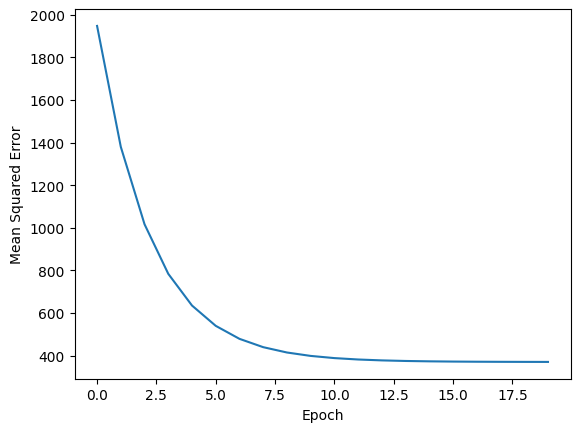

In [ ]:
import numpy as np
plt.plot(np.arange(20),LossT)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = LModel.forward(X_Train)
test_pred = LModel.forward(X_Test)

print('Train MSE: %.5f' % LModel.loss(train_pred, yTrain))
print('Test MSE: %.5f' % LModel.loss(test_pred, yTest))

Train MSE: 370.22375
Test MSE: 430.65616


In [ ]:
print('Weights', LModel.weights)
print('Bias', LModel.bias)

Weights tensor([[-0.6354],
        [39.2148]])
Bias tensor([-1.9925])


In [ ]:
def analytical_solution(x, y):
    Xb = torch.cat( (torch.ones((x.size(0), 1)), x), dim=1)
    w = torch.zeros(x.size(1))
    z = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

w, b = analytical_solution(X_Train, yTrain)
print('Analytical weights', w)
print('Analytical bias', b)

Analytical weights tensor([[-0.6008],
        [39.6762]])
Analytical bias tensor([-2.0157])


In [ ]:
torch.__version__


'2.1.0+cu121'

#Semi Auto Implementation

In [ ]:
class LinearRegAuto :

  def __init__(self,numFeatures):
    self.numFeatures = numFeatures
    # self.weights = torch.zeros((numFeatures,1),dtype=torch.float,requiresGrad=True)
    # self.weights = torch.zeros((numFeatures, 1), dtype=torch.float, requires_grad=True)
    self.weights = torch.zeros(numFeatures, 1,
                                  dtype=torch.float,
                                  requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float,
                                requires_grad=True)
    # self.bias = torch.zeros(1,dtype=torch.float,requiresGrad=True)

  def forward(self,X):
    predictions = torch.add(torch.mm(X,self.weights),self.bias)
    return predictions.view(-1)




  def loss(self,yhat,y):
    return torch.mean((yhat-y)**2)

  def train(self,X,y,epoch):
    cost = []
    for i in range(epoch):
      pred = self.forward(X)
      L = self.loss(y,pred)
      cost.append(L.detach().numpy())

      weightback= torch.autograd.grad(L,self.weights,retain_graph=True)[0]
      # print(weightback)
      biasback= torch.autograd.grad(L,self.bias)[0]
      with torch.no_grad():
        self.weights -=0.1*weightback
        self.bias -=0.1*biasback
    return cost

In [ ]:
LModel2 = LinearRegAuto(2)

In [ ]:
LossT2 = LModel2.train(X_Train,yTrain,20)

tensor([[  2.6318],
        [-79.2750]])
tensor([[  1.8200],
        [-63.4303]])
tensor([[  1.2276],
        [-50.7535]])
tensor([[  0.7992],
        [-40.6111]])
tensor([[  0.4930],
        [-32.4961]])
tensor([[  0.2773],
        [-26.0032]])
tensor([[  0.1281],
        [-20.8081]])
tensor([[  0.0274],
        [-16.6512]])
tensor([[ -0.0382],
        [-13.3250]])
tensor([[ -0.0786],
        [-10.6635]])
tensor([[-0.1014],
        [-8.5337]])
tensor([[-0.1119],
        [-6.8295]])
tensor([[-0.1142],
        [-5.4657]])
tensor([[-0.1111],
        [-4.3744]])
tensor([[-0.1047],
        [-3.5010]])
tensor([[-0.0964],
        [-2.8020]])
tensor([[-0.0873],
        [-2.2427]])
tensor([[-0.0779],
        [-1.7950]])
tensor([[-0.0688],
        [-1.4367]])
tensor([[-0.0603],
        [-1.1500]])


In [ ]:
LossT2

[array(1947.5277, dtype=float32),
 array(1379.832, dtype=float32),
 array(1016.4833, dtype=float32),
 array(783.9065, dtype=float32),
 array(635.0234, dtype=float32),
 array(539.7089, dtype=float32),
 array(478.684, dtype=float32),
 array(439.60974, dtype=float32),
 array(414.58844, dtype=float32),
 array(398.5647, dtype=float32),
 array(388.30215, dtype=float32),
 array(381.72888, dtype=float32),
 array(377.5183, dtype=float32),
 array(374.821, dtype=float32),
 array(373.0929, dtype=float32),
 array(371.98566, dtype=float32),
 array(371.27618, dtype=float32),
 array(370.82156, dtype=float32),
 array(370.53024, dtype=float32),
 array(370.34348, dtype=float32)]

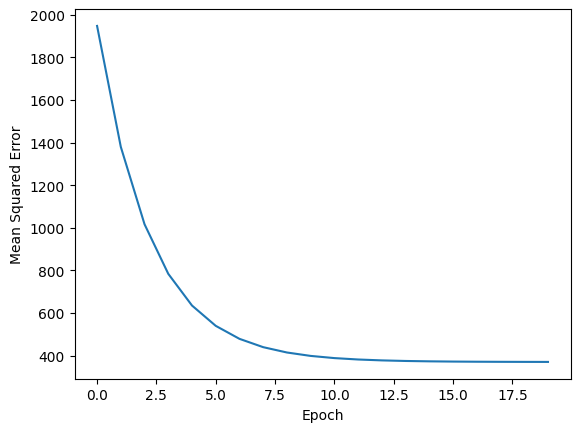

In [ ]:
import numpy as np
plt.plot(np.arange(20),LossT2)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = LModel2.forward(X_Train)
test_pred = LModel2.forward(X_Test)

print('Train MSE: %.5f' % LModel2.loss(train_pred, yTrain))
print('Test MSE: %.5f' % LModel2.loss(test_pred, yTest))

Train MSE: 370.22375
Test MSE: 430.65616


In [ ]:
print('Weights', LModel2.weights)
print('Bias', LModel2.bias)

Weights tensor([[-0.6354],
        [39.2148]], requires_grad=True)
Bias tensor([-1.9925], requires_grad=True)


#Auto Implementation

In [ ]:
class AutoLinearReg(torch.nn.Module) :
  def __init__(self,numFeatures):
    super(AutoLinearReg,self).__init__()
    self.linear = torch.nn.Linear(numFeatures,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()

  def forward(self,X):
    netInputs = self.linear(X)
    return netInputs.view(-1)

  def train(self,X,y,epoch):

    cost = []

    for i in range(epoch):
      yhat = self.linear(X)
      loss = torch.nn.functional.mse_loss(yhat,y[None,:].t())
      optimizer = torch.optim.SGD(self.parameters(),lr=0.1)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # print(yhat.shape)
      with torch.no_grad():
        l = torch.nn.functional.mse_loss(yhat,y[None,:].t())
        # print(l)
        cost.append(l)
    return cost


In [ ]:
LModel3 = AutoLinearReg(2)

In [ ]:
yTrain.shape

torch.Size([800])

In [ ]:
LossT3 = LModel3.train(X_Train,yTrain,20)

In [ ]:
LossT3

[tensor(1947.5277),
 tensor(1379.8320),
 tensor(1016.4833),
 tensor(783.9065),
 tensor(635.0234),
 tensor(539.7089),
 tensor(478.6840),
 tensor(439.6097),
 tensor(414.5884),
 tensor(398.5647),
 tensor(388.3022),
 tensor(381.7289),
 tensor(377.5183),
 tensor(374.8210),
 tensor(373.0929),
 tensor(371.9857),
 tensor(371.2762),
 tensor(370.8216),
 tensor(370.5302),
 tensor(370.3435)]

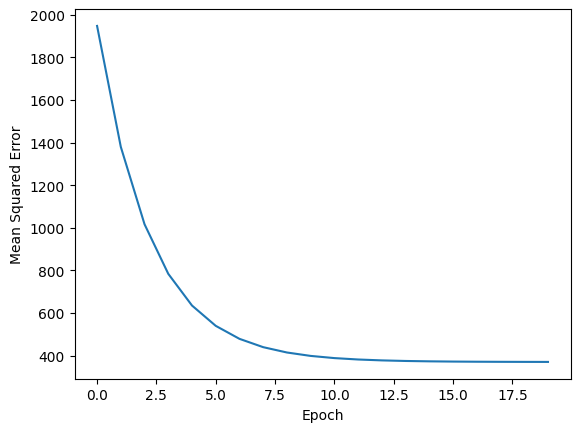

In [ ]:
import numpy as np
plt.plot(np.arange(20),LossT3)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = LModel3.forward(X_Train)
test_pred = LModel3.forward(X_Test)

print('Train MSE: %.5f' % torch.nn.functional.mse_loss(train_pred, yTrain))
print('Test MSE: %.5f' % torch.nn.functional.mse_loss(test_pred, yTest))

Train MSE: 370.22375
Test MSE: 430.65616


In [ ]:
print('Weights', LModel3.weight)
print('Bias', LModel3.bias)

AttributeError: 'AutoLinearReg' object has no attribute 'weight'